# Barrio Tortuga SEIR

- Barrio Tortuga SEIR is a toy model to reproduce SEIR equations. 
- In this version the turtles move at random trhough a barrio without streets  
- We first run the model without infection to compute the average number of contacts per tick.
- Then we run SEIR, which consideres four categories: S, E, I and R.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14
import os
import sys
import glob
import time
import warnings
import datetime 
print("Last updated on ", time.asctime())
import numpy as np
import pandas as pd
import matplotlib

Last updated on  Thu Apr 23 14:54:45 2020


In [2]:
fontsize=20
font = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': fontsize,
        }

plt.rcParams["font.size"     ] = fontsize


In [3]:
from mesa import Agent, Model
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
from mesa.visualization.TextVisualization import TextVisualization, TextGrid

In [4]:
from termcolor import colored

In [44]:
from barrio_tortuga.barrio_tortuga.BarrioTortugaSEIR import BarrioTortugaSEIR

In [46]:
from barrio_tortuga.barrio_tortuga.utils import PrtLvl, print_level

# Definition of Barrio Tortuga for SEIR

### Assumptions of SEIR:

- Population mixed in an homogenous way.
- The larger the number of contacts the faster the simulation will progress.
- The space here can be defined as a toroidal grid of 20 x 20 = 400 patches, so that populations of a few thousands will result in enough stats.  
    

# Barrio Tortuga SEIR

In [260]:
def run_series(ns=100, steps= 100, turtles=1000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40, fprint=25):
    DFT = [run_turtles_calib(steps, turtles, i0, r0, nc, ti, tr, width, height, False, PrtLvl.Mute, fprint) for i in range(ns)]
    df = pd.concat(DFT)
    return df.groupby(df.index).mean()
    
def r0(dft, tmax=20, tr=5):
    T = dft.index.values
    E = dft.NumberOfExposed.values
    I = dft.NumberOfInfected.values
    S = dft.NumberOfSusceptible.values
    R = dft.NumberOfRecovered.values
    N = S[0] + I[0]
    r0 = np.array([(E[t] - E[t-1]) / (S[t-1]/N) / I[t-1] for t in T[1:tmax]])
    return T[1:tmax], r0 * tr

In [225]:
def run_turtles_calib(steps= 150, turtles=5000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=25):
    """Calibrate SEIR"""
    
    print(f" Running Barrio Tortuga SEIR with {turtles}  turtles, for {steps} steps.")
    bt = BarrioTortugaSEIR(turtles, i0, r0, nc, ti, tr, width, height, calib, prtl)
    
    for i in range(steps):
        if i%fprint == 0:
            print(f' step {i}')
        bt.step()
    print('Done!')
    return bt.datacollector.get_model_vars_dataframe()

In [ ]:
def peak_position(dft):
    return dft.NumberOfInfected.idxmax(), dft.NumberOfInfected.max()

## Calibrate for 5000 events

In [301]:
cft5k = run_turtles_calib(steps= 100, turtles=5000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40, calib=True, prtl=PrtLvl.Concise, fprint=100)

 Running Barrio Tortuga SEIR with 5000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 5000
            initial infected        = 10
            fraction infected       = 0.002
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 2.3
            P (trans. prob/contact) = 1
            Calib                   = True
            Grid (w x h)            = 40 x 40
            
 step 0
Done!


In [316]:
NC5k = cft5k.mean().values[0]
NC5k

23.88247524752476

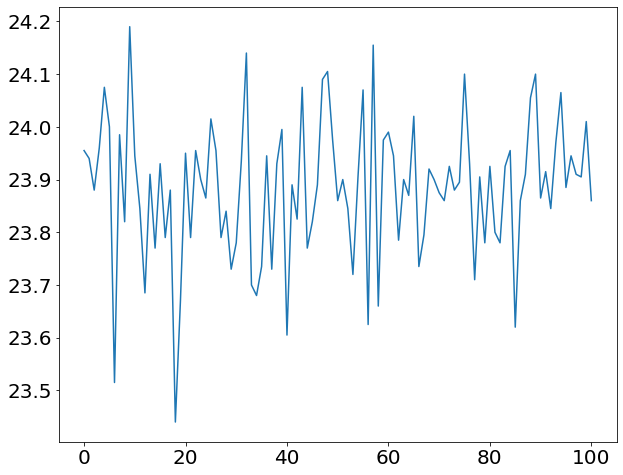

In [303]:
plt.plot(cft5k.index, cft5k.NumberOfneighbors)

## Calibrate for 1000 events

In [304]:
cft1k = run_turtles_calib(steps= 100, turtles=1000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40, calib=True, prtl=PrtLvl.Concise, fprint=100)

 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 1000
            initial infected        = 10
            fraction infected       = 0.01
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 2.3
            P (trans. prob/contact) = 1
            Calib                   = True
            Grid (w x h)            = 40 x 40
            
 step 0
Done!


In [314]:
NC1k = cft1k.mean().values[0]
NC1k

2.3287128712871286

## Calibrate for 10000 events

In [426]:
cft10k = run_turtles_calib(steps= 3, turtles=8000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40, calib=True, prtl=PrtLvl.Concise, fprint=25)

 Running Barrio Tortuga SEIR with 8000  turtles, for 3 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 8000
            initial infected        = 10
            fraction infected       = 0.00125
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 2.3
            P (trans. prob/contact) = 1
            Calib                   = True
            Grid (w x h)            = 40 x 40
            
number of turtles in this cell  = 10
number of turtles in this cell  = 4
x = 2 y = 2
number of turtles in this cell  = 3
coordinates of neighbors inlcuding center = [(1, 1), (2, 1), (3, 1), (1, 2), (2, 2), (3, 2), (1, 3), (2, 3), (3, 3)]
coordinates of neighbors = (1, 1)
nof turtles = 5
coordinates of neighbors = (2, 1)
nof turtles = 6
coordinates of neighbors = (3, 1)
nof turtles = 4
coordinates of neighbors = (1, 2)
nof turtles = 4
coordinates of neighbors = (2, 2)

In [424]:
NC10k = cft10k.mean().values[0]
NC10k

89.0

In [419]:
cft10k.head()

,NumberOfneighbors
0,89.0
1,89.0
2,89.0
3,89.0
4,89.0


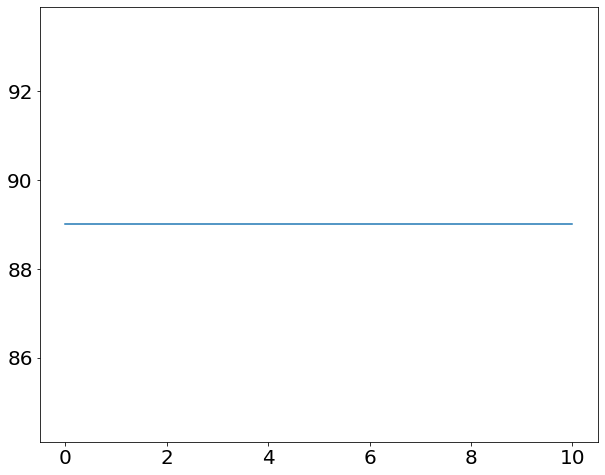

In [420]:
plt.plot(cft10k.index, cft10k.NumberOfneighbors )

In [381]:
cft10k.plot("NumberOfneighbors")

TypeError: Empty 'DataFrame': no numeric data to plot

In [430]:
dft1k = run_turtles_calib(steps= 2, turtles=1000, i0=5, r0 = 3.5, nc=1, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Verbose, fprint=25)

 Running Barrio Tortuga SEIR with 1000  turtles, for 2 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 1000
            initial infected        = 5
            fraction infected       = 0.005
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 1
            P (trans. prob/contact) = 0.7
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
coordinates of neighbors, including me = [(34, 36), (35, 36), (36, 36), (34, 37), (35, 37), (36, 37), (34, 38), (35, 38), (36, 38)]
neighbors = (34, 36)
 number of turtles = 2
 turtle kind = S
 throwing dice
 turtle kind = S
 throwing dice
 turning turtle into E
neighbors = (35, 36)
 number of turtles = 0
neighbors = (36, 36)
 number of turtles = 0
neighbors = (34, 37)
 number of turtles = 0
neighbors = (35, 37)
 number of turtles = 1
 turtle kind = I
neighbors

## Single run with 1000 events

In [323]:
dft1k = run_turtles_calib(steps= 100, turtles=1000, i0=10, r0 = 3.5, nc=NC1k, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=25)

 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 1000
            initial infected        = 10
            fraction infected       = 0.01
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 2.3287128712871286
            P (trans. prob/contact) = 0.3005952380952381
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
 step 25
 step 50
 step 75
Done!


In [324]:
dft1k.NumberOfInfected.max()

152

In [325]:
dft1k.NumberOfInfected.idxmax()

45

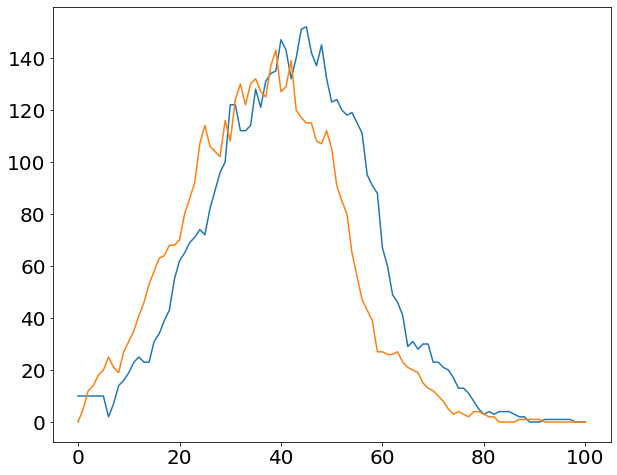

In [326]:
plt.plot(dft1k.index, dft1k.NumberOfInfected )
plt.plot(dft1k.index, dft1k.NumberOfExposed)

## 100 runes of 1000 turtles

In [321]:
dfs1k = run_series(ns=100, steps= 100, turtles=1000, i0=100, r0 = 3.5, nc=NC1k, ti = 5, tr = 5, width=40, height=40, fprint=100)

 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.
 step 0
Done!
 Running Barrio Tortuga SEIR with 1000  turtles, for 100 steps.


## average of 100 runs

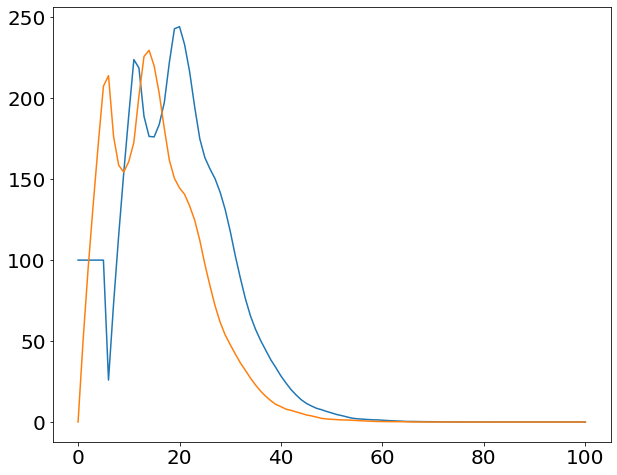

In [322]:
plt.plot(dfs1k.index, dfs1k.NumberOfInfected )
plt.plot(dfs1k.index, dfs1k.NumberOfExposed)

In [263]:
peak_position(dfs1k)

(63, 69.3)

In [264]:
T, R0 = r0(dfs1k, tmax=6)

In [265]:
np.mean(R0)

2.643566673619665

## 5000 turtles

In [248]:
dft5k = run_turtles_calib(steps= 100, turtles=5000, i0=10, r0 = 3.5, nc=23.9, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=100)

 Running Barrio Tortuga SEIR with 5000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 5000
            initial infected        = 10
            fraction infected       = 0.002
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 23.9
            P (trans. prob/contact) = 0.029288702928870293
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
Done!


In [250]:
peak_position(dft5k)

(43, 1083)

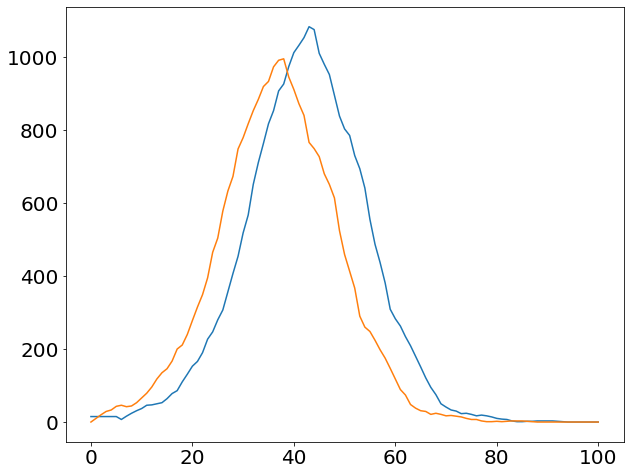

In [252]:
plt.plot(dft5k.index, dft5k.NumberOfInfected )
plt.plot(dft5k.index, dft5k.NumberOfExposed)

## 20 runs

In [253]:
dfs5k = run_series(ns=20, steps= 100, turtles=5000, i0=10, r0 = 3.5, nc=23.9, ti = 5, tr = 5, width=40, height=40, fprint=25)

 Running Barrio Tortuga SEIR with 5000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 5000
            initial infected        = 10
            fraction infected       = 0.002
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 23.9
            P (trans. prob/contact) = 0.029288702928870293
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 5000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 5000
            initial infected        = 10
            fraction infected       = 0.002
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 23.9
            P (trans.

In [254]:
peak_position(dfs5k)

(46, 1002.75)

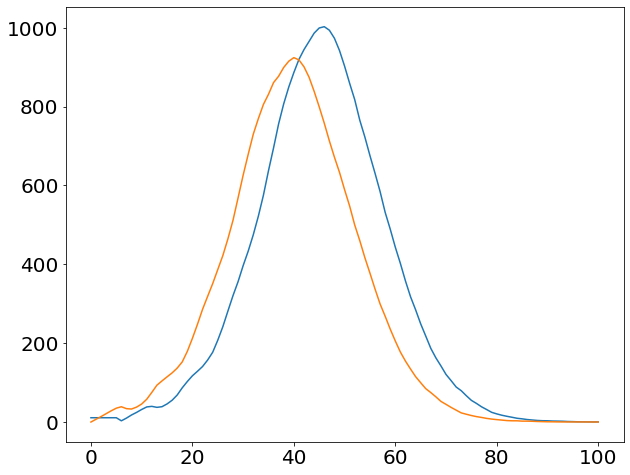

In [255]:
plt.plot(dfs5k.index, dfs5k.NumberOfInfected )
plt.plot(dfs5k.index, dfs5k.NumberOfExposed)

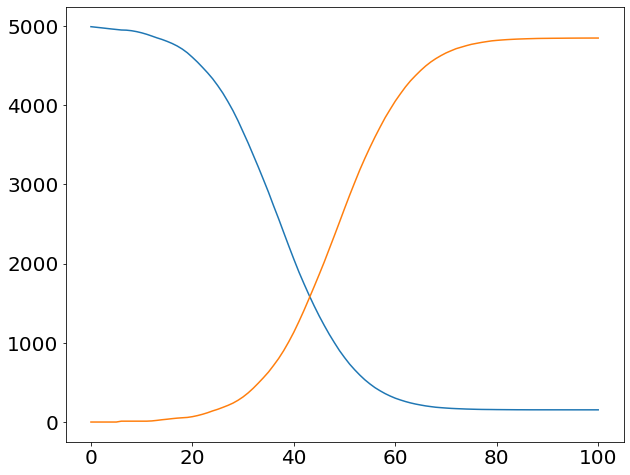

In [258]:
plt.plot(dfs5k.index, dfs5k.NumberOfSusceptible )
plt.plot(dfs5k.index, dfs5k.NumberOfRecovered)

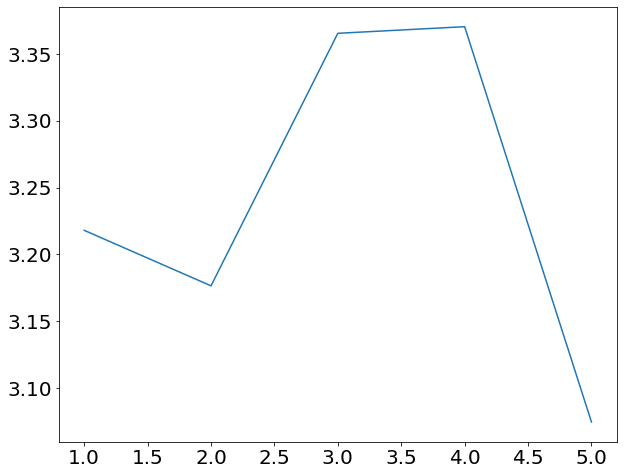

In [259]:
plt.plot(T, R0)

In [256]:
T, R0 = r0(dfs5k, tmax=6)

In [257]:
np.mean(R0)

3.2409595971180964

## 10,0000 turtles

In [436]:
turtles = 10000
infected = 100
susceptibles = turtles - infected
width=40
height=40
ncc = 9
a = width * height
NC = (ncc * susceptibles / a ) -1 
print(f'for turtles = {turtles}, area = {a}, NC ={NC}')

for turtles = 10000, area = 1600, NC =54.6875


In [440]:
dft10k = run_turtles_calib(steps= 100, turtles=10000, i0=100, r0 = 3.5, nc=NC, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=25)

 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 10000
            initial infected        = 100
            fraction infected       = 0.01
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 54.6875
            P (trans. prob/contact) = 0.0128
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
 step 25
 step 50
 step 75
Done!


In [441]:
dft10k.head()

,NumberOfInfected,NumberOfSusceptible,NumberOfRecovered,NumberOfExposed
0,100,9900,0,0
1,100,9827,0,73
2,100,9759,0,141
3,100,9694,0,206
4,100,9621,0,279


In [447]:
dft10k.to_csv('seir10k.csv')

In [367]:
dft10k = run_turtles_calib(steps= 100, turtles=10000, i0=100, r0 = 3.5, nc=NC10k, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=25)

 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 10000
            initial infected        = 100
            fraction infected       = 0.01
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 56.13683168316832
            P (trans. prob/contact) = 0.012469531660617091
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
 step 0
 step 25
 step 50
 step 75
Done!


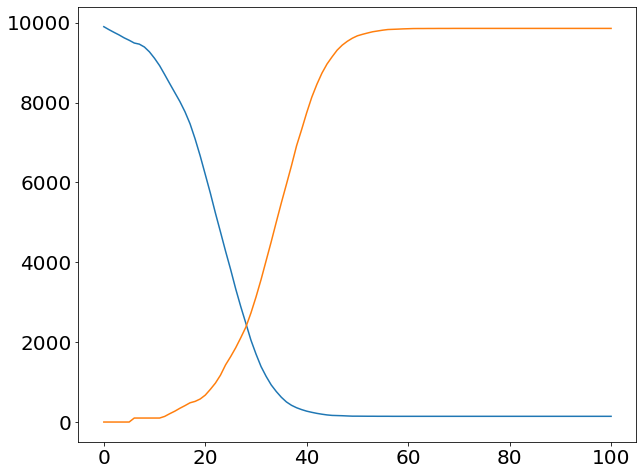

In [442]:
plt.plot(dft10k.index, dft10k.NumberOfSusceptible )
plt.plot(dft10k.index, dft10k.NumberOfRecovered)

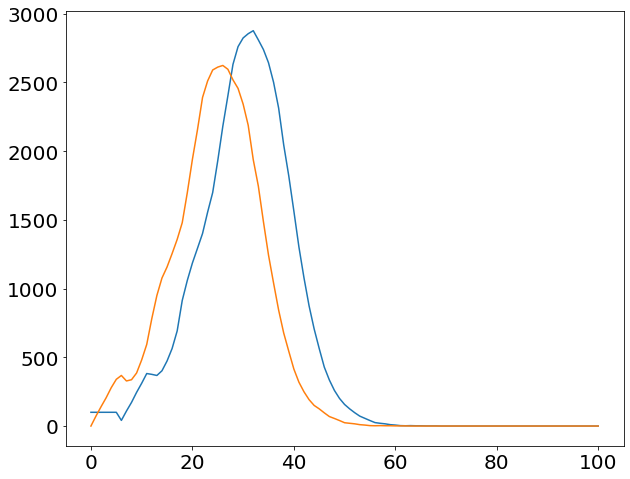

In [443]:
plt.plot(dft10k.index, dft10k.NumberOfInfected )
plt.plot(dft10k.index, dft10k.NumberOfExposed)

In [444]:
peak_position(dft10k)

(32, 2877)

In [445]:
T, R0 = r0(dft10k, tmax=6)

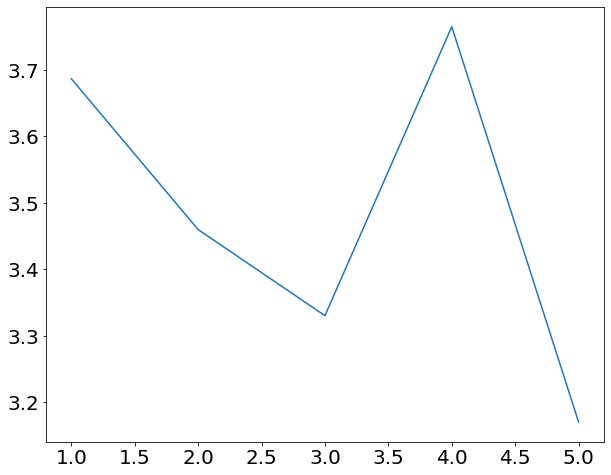

In [446]:
plt.plot(T, R0)

In [347]:
dft10k.head()

,NumberOfInfected,NumberOfSusceptible,NumberOfRecovered,NumberOfExposed
0,100,9900,0,0
1,100,9815,0,85
2,100,9748,0,152
3,100,9690,0,210
4,100,9633,0,267


In [346]:
dfs10k = run_series(ns=20, steps= 100, turtles=10000, i0=100, r0 = 3.5, nc=NC10k, ti = 5, tr = 5, width=40, height=40, fprint=25)

 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtl

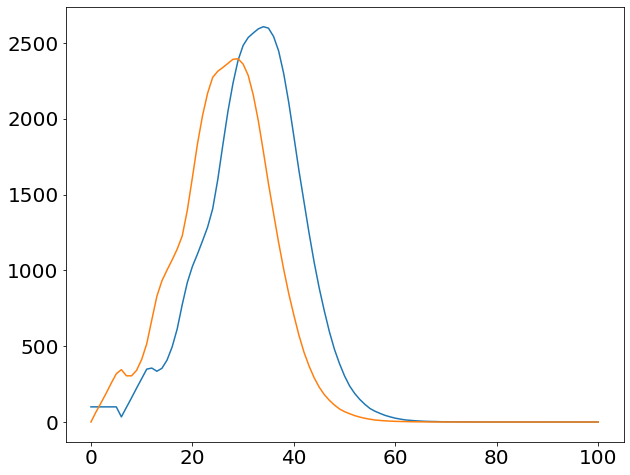

In [348]:
plt.plot(dfs10k.index, dfs10k.NumberOfInfected )
plt.plot(dfs10k.index, dfs10k.NumberOfExposed)

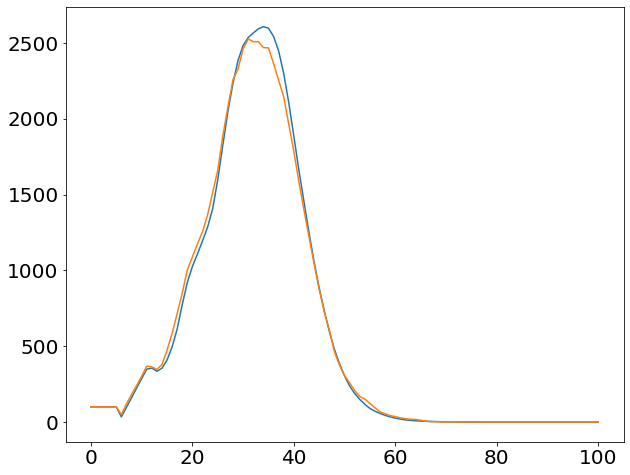

In [349]:
plt.plot(dfs10k.index, dfs10k.NumberOfInfected )
plt.plot(dft10k.index, dft10k.NumberOfInfected )

In [352]:
peak_position(dft10k)

(31, 2526)

In [353]:
peak_position(dfs10k)

(34, 2606.75)

In [356]:
dfs10k.to_csv('seir10k.csv')

In [360]:
def run_series_csv(ns=100, steps= 100, turtles=1000, i0=10, r0 = 3.5, nc=2.3, ti = 5, tr = 5, width=40, height=40,fprint=25):
    DFT = [run_turtles_calib(steps, turtles, i0, r0, nc, ti, tr, width, height, False, PrtLvl.Mute, fprint) for i in range(ns)]
    
    for i in range(len(DFT)):
        file=f'Turtles_n_{turtles}_i0_{i0}_r0_{r0}_ti_{ti}_tr_{tr}_run_{i}'
        DFT[i].to_csv(file)
        
    df = pd.concat(DFT)
    file=f'Turtles_n_{turtles}_i0_{i0}_r0_{r0}_ti_{ti}_tr_{tr}_run_average'
    df.to_csv(file)
    
    return df.groupby(df.index).mean()


In [364]:
dfs10k = run_series_csv(ns=100, steps= 100, turtles=10000, i0=100, r0 = 3.5, nc=NC10k, ti = 5, tr = 5, width=40, height=40, fprint=25)

 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtles, for 100 steps.
 step 0
 step 25
 step 50
 step 75
Done!
 Running Barrio Tortuga SEIR with 10000  turtl

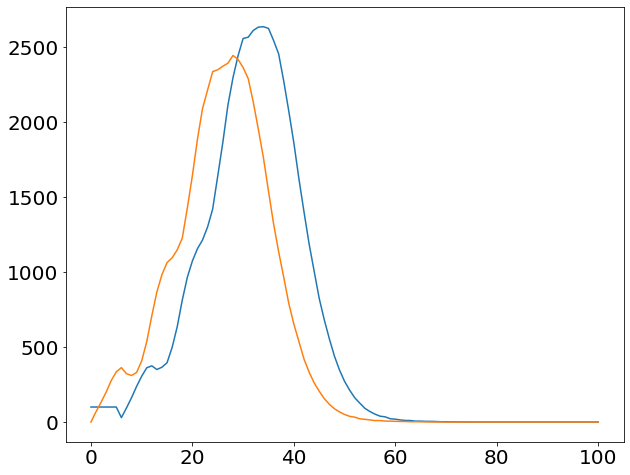

In [362]:
plt.plot(dfs10k.index, dfs10k.NumberOfInfected )
plt.plot(dfs10k.index, dfs10k.NumberOfExposed)

In [363]:
peak_position(dfs10k)

(34, 2635.0)

In [291]:
dft10k = run_turtles_calib(steps= 100, turtles=100, i0=10, r0 = 3.5, nc=49.9, ti = 5, tr = 5, width=40, height=40, calib=False, prtl=PrtLvl.Concise, fprint=100)

 Running Barrio Tortuga SEIR with 100  turtles, for 100 steps.
Barrio Tortuga SEIR parameters
            number of turtles       = 100
            initial infected        = 10
            fraction infected       = 0.1
            R0                      = 3.5
            Ti (incubation time)    = 5
            Tr (recovery time)      = 5
            number of contacts      = 49.9
            P (trans. prob/contact) = 0.014028056112224449
            Calib                   = False
            Grid (w x h)            = 40 x 40
            
A = ['S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S',